<a href="https://colab.research.google.com/github/cazathoth/tfm/blob/main/tfm_jvasquez_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#descarga librerias.
install.packages("tidyverse")
install.packages("arrow")
install.packages("lubridate")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘assertthat’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
#cargo librerias a utilizar.
library("tidyverse")
library("arrow")
library("lubridate")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘arrow’


The following object is masked from ‘package:lubridate’:

    duration


The following object is masked from ‘package:utils’:

    timestamp




In [3]:
#creo directorio y descargo dataset con datos de urgencias respiratorias
dir.create("descargas")
url <- "https://datos.gob.cl/dataset/606ef5bb-11d1-475b-b69f-b980da5757f4/resource/ae6c9887-106d-4e98-8875-40bf2b836041/download/at_urg_respiratorio_semanal.parquet"
nombre_temporal <- "descargas/at_urg_respiratorio_semanal.parquet"
download.file(url, nombre_temporal)

In [4]:
#Descargo y creo datos meteorologicos
url <- "https://raw.githubusercontent.com/cazathoth/data/9ed2ff302d64b81e79eab693e77d12f805ed65ba/MERGE_XXXX_DiarioTs_.csv"
nombre_temporal <- "descargas/MERGE_XXXX_DiarioTs_.csv"
download.file(url, nombre_temporal)

In [5]:
df_urgr_esp_semanal <- read_parquet("descargas/at_urg_respiratorio_semanal.parquet", col_select = c ('EstablecimientoCodigo','RegionCodigo', 'RegionGlosa','ComunaCodigo','ComunaGlosa', 'Anio', 'SemanaEstadistica','OrdenCausa','Causa','NumTotal'))

In [20]:
df_datos_temperatura <- read.csv("descargas/MERGE_XXXX_DiarioTs_.csv", header= TRUE, sep=";")

In [21]:
df_datos_temperatura$momento<- format(as.POSIXct(df_datos_temperatura$momento, format = "%d-%m-%Y %H:%M:%S"), format = "%d-%m-%Y")
count(df_urgr_esp_semanal)
count(df_datos_temperatura)
head(df_datos_temperatura,10)


n
<int>
2841087


n
<int>
74539


,CodigoNacional,momento,MediaCli_Valor,MediaAri_Valor,NumDatos_Valor,Ts00_Valor,Ts12_Valor,Maxima_Valor,FechaMax_Valor,Minima_Valor,FechaMin_Valor,FechaPro_Valor
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,290004,01-01-1954,16.5,18.1,14,NA,17.0,20.6,NA,12.3,NA,NA
2,290004,02-01-1954,17.1,17.5,14,NA,15.5,20.4,NA,13.9,NA,NA
3,290004,03-01-1954,15.1,17.4,14,NA,15.4,20.0,NA,10.2,NA,NA
4,290004,04-01-1954,16.9,17.5,14,NA,15.0,20.8,NA,13.0,NA,NA
5,290004,05-01-1954,17.7,17.8,14,NA,16.1,20.4,NA,15.0,NA,NA
6,290004,06-01-1954,15.2,17.4,14,NA,13.8,20.2,NA,10.2,NA,NA
7,290004,07-01-1954,15.9,17.0,14,NA,15.0,19.7,NA,12.0,NA,NA
8,290004,08-01-1954,15.7,16.7,14,NA,14.4,20.4,NA,11.0,NA,NA
9,290004,09-01-1954,15.9,16.9,14,NA,14.8,19.5,NA,12.4,NA,NA


In [23]:
semana<-week(dmy(df_datos_temperatura$momento))


In [25]:
df_datos_temperatura <- cbind(df_datos_temperatura, NuSemana = semana)


In [26]:
df_datos_temperatura

CodigoNacional,momento,MediaCli_Valor,MediaAri_Valor,NumDatos_Valor,Ts00_Valor,Ts12_Valor,Maxima_Valor,FechaMax_Valor,Minima_Valor,FechaMin_Valor,FechaPro_Valor,NuSemana
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
290004,01-01-1954,16.5,18.1,14,NA,17.0,20.6,NA,12.3,NA,NA,1
290004,02-01-1954,17.1,17.5,14,NA,15.5,20.4,NA,13.9,NA,NA,1
290004,03-01-1954,15.1,17.4,14,NA,15.4,20.0,NA,10.2,NA,NA,1
290004,04-01-1954,16.9,17.5,14,NA,15.0,20.8,NA,13.0,NA,NA,1
290004,05-01-1954,17.7,17.8,14,NA,16.1,20.4,NA,15.0,NA,NA,1
290004,06-01-1954,15.2,17.4,14,NA,13.8,20.2,NA,10.2,NA,NA,1
290004,07-01-1954,15.9,17.0,14,NA,15.0,19.7,NA,12.0,NA,NA,1
290004,08-01-1954,15.7,16.7,14,NA,14.4,20.4,NA,11.0,NA,NA,2
290004,09-01-1954,15.9,16.9,14,NA,14.8,19.5,NA,12.4,NA,NA,2


In [ ]:
#Limpio los registros con NA
sum(is.na(df_urgr_esp_semanal))
sum(!complete.cases(df_urgr_esp_semanal))

[1] 11580

[1] 2316

In [ ]:
df_urgr_esp_semanal <- na.omit(df_urgr_esp_semanal)
sum(is.na(df_urgr_esp_semanal))
sum(!complete.cases(df_urgr_esp_semanal))
count(df_urgr_esp_semanal)

[1] 0

[1] 0

n
<int>
2816775


In [ ]:
#Aqui estan todas las causas consideradas. La #3 es un total.
df_urgr_esp_semanal %>% select(OrdenCausa, Causa)%>%distinct()%>%arrange(OrdenCausa)

OrdenCausa,Causa
<int>,<chr>
3,TOTAL CAUSAS SISTEMA RESPIRATORIO
4,IRA Alta (J00-J06)
5,Influenza (J09-J11)
6,Neumonía (J12-J18)
7,Bronquitis/bronquiolitis aguda (J20-J21)
8,Crisis obstructiva bronquial (J40-J46)
9,"Otra causa respiratoria (J22, J30-J39, J47, J60-J98)"
10,"Covid-19, Virus no identificado U07.2"
11,"Covid-19, Virus identificado U07.1"


In [ ]:
#Filtro el dataset par las regiones 8,4 y 13, tambien la causa 3 que es solo totalizador de urgencias reportadas
df_urgr_esp_semanal<- df_urgr_esp_semanal %>% filter (RegionCodigo %in% c(8,4,13) & OrdenCausa != 3)
count(df_urgr_esp_semanal)
head(df_urgr_esp_semanal,5)

n
<int>
1086346


EstablecimientoCodigo,RegionCodigo,RegionGlosa,ComunaCodigo,ComunaGlosa,Anio,SemanaEstadistica,OrdenCausa,Causa,NumTotal
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>
200173,8,Región Del Bíobío,8206,Los Álamos,2019,8,7,Bronquitis/bronquiolitis aguda (J20-J21),6
200123,13,Región Metropolitana de Santiago,13501,Melipilla,2021,31,4,IRA Alta (J00-J06),51
120107,8,Región Del Bíobío,8312,Tucapel,2020,41,8,Crisis obstructiva bronquial (J40-J46),2
109811,13,Región Metropolitana de Santiago,13302,Lampa,2015,35,7,Bronquitis/bronquiolitis aguda (J20-J21),59
113808,13,Región Metropolitana de Santiago,13116,Lo Espejo,2016,16,7,Bronquitis/bronquiolitis aguda (J20-J21),40


In [ ]:
#Obtengo el total de urgencias reportadas en todos los años por las 3 regiones.
df_urgr_esp_semanal%>% group_by(RegionGlosa) %>% summarise(Total = sum(NumTotal, na.rm = TRUE))

RegionGlosa,Total
<chr>,<int>
Región De Coquimbo,1873385
Región Del Bíobío,6789952
Región Metropolitana de Santiago,19197252


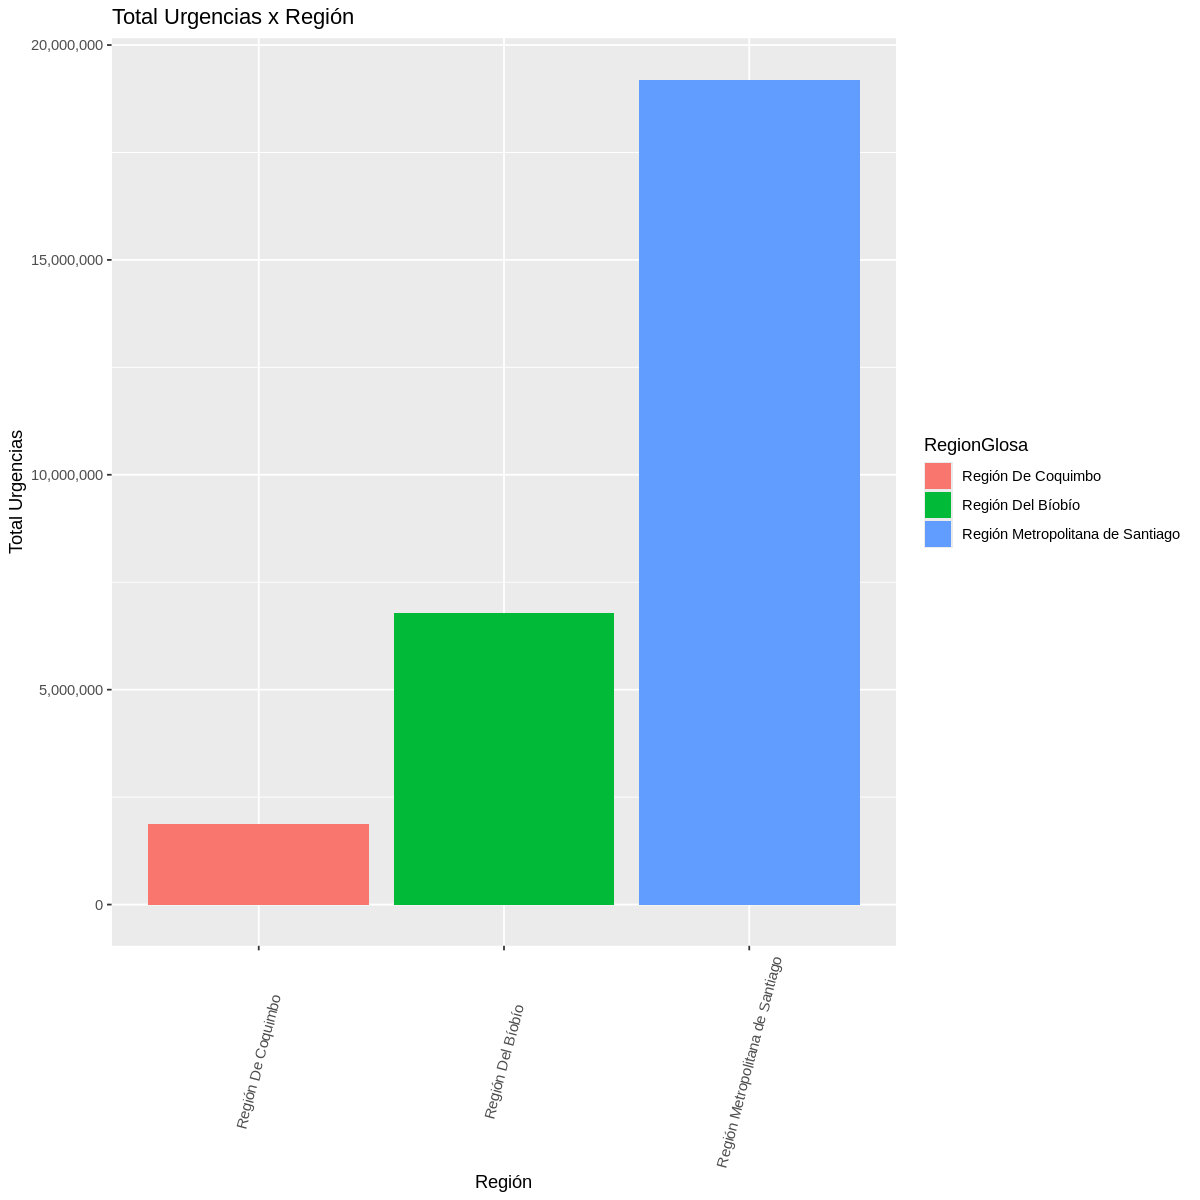

In [ ]:
# Grafico la cantidad de casos por región
df_plot1<-df_urgr_esp_semanal%>% group_by(RegionGlosa) %>% summarise(Total = sum(NumTotal, na.rm = TRUE))
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(df_plot1, aes(x=RegionGlosa, y= Total, fill= RegionGlosa)) + geom_bar(stat="identity") +
scale_y_continuous(labels = scales::comma_format(accuracy = 1))+
theme(axis.text.x = element_text(angle = 75, vjust = .5))+
labs(x = "Región", y = "Total Urgencias", title = "Total Urgencias x Región")

In [ ]:
# Obtengo cantidad de urgencias por año y region
df_resumen <- df_urgr_esp_semanal %>%
  group_by(Anio, RegionGlosa) %>%
  summarise(Total = sum(NumTotal, na.rm = TRUE))
  df_resumen

`summarise()` has grouped output by 'Anio'. You can override using the
`.groups` argument.


Anio,RegionGlosa,Total
<int>,<chr>,<int>
2014,Región De Coquimbo,174596
2014,Región Del Bíobío,650757
2014,Región Metropolitana de Santiago,1959313
2015,Región De Coquimbo,178524
2015,Región Del Bíobío,694972
2015,Región Metropolitana de Santiago,2095817
2016,Región De Coquimbo,178086
2016,Región Del Bíobío,654439
2016,Región Metropolitana de Santiago,2069127


In [ ]:
# Obtengo cantidad de urgencias por año, semana y region.
df_resumen <- df_urgr_esp_semanal %>%
  group_by(Anio, SemanaEstadistica, Causa) %>%
  summarise(Total = sum(NumTotal, na.rm = TRUE))
  df_resumen

`summarise()` has grouped output by 'Anio', 'SemanaEstadistica'. You can
override using the `.groups` argument.


Anio,SemanaEstadistica,Causa,Total
<int>,<int>,<chr>,<int>
2014,1,Bronquitis/bronquiolitis aguda (J20-J21),2364
2014,1,Crisis obstructiva bronquial (J40-J46),1160
2014,1,HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO,300
2014,1,IRA Alta (J00-J06),13389
2014,1,Influenza (J09-J11),179
2014,1,Neumonía (J12-J18),659
2014,1,"Otra causa respiratoria (J22, J30-J39, J47, J60-J98)",3278
2014,2,Bronquitis/bronquiolitis aguda (J20-J21),3679
2014,2,Crisis obstructiva bronquial (J40-J46),1992


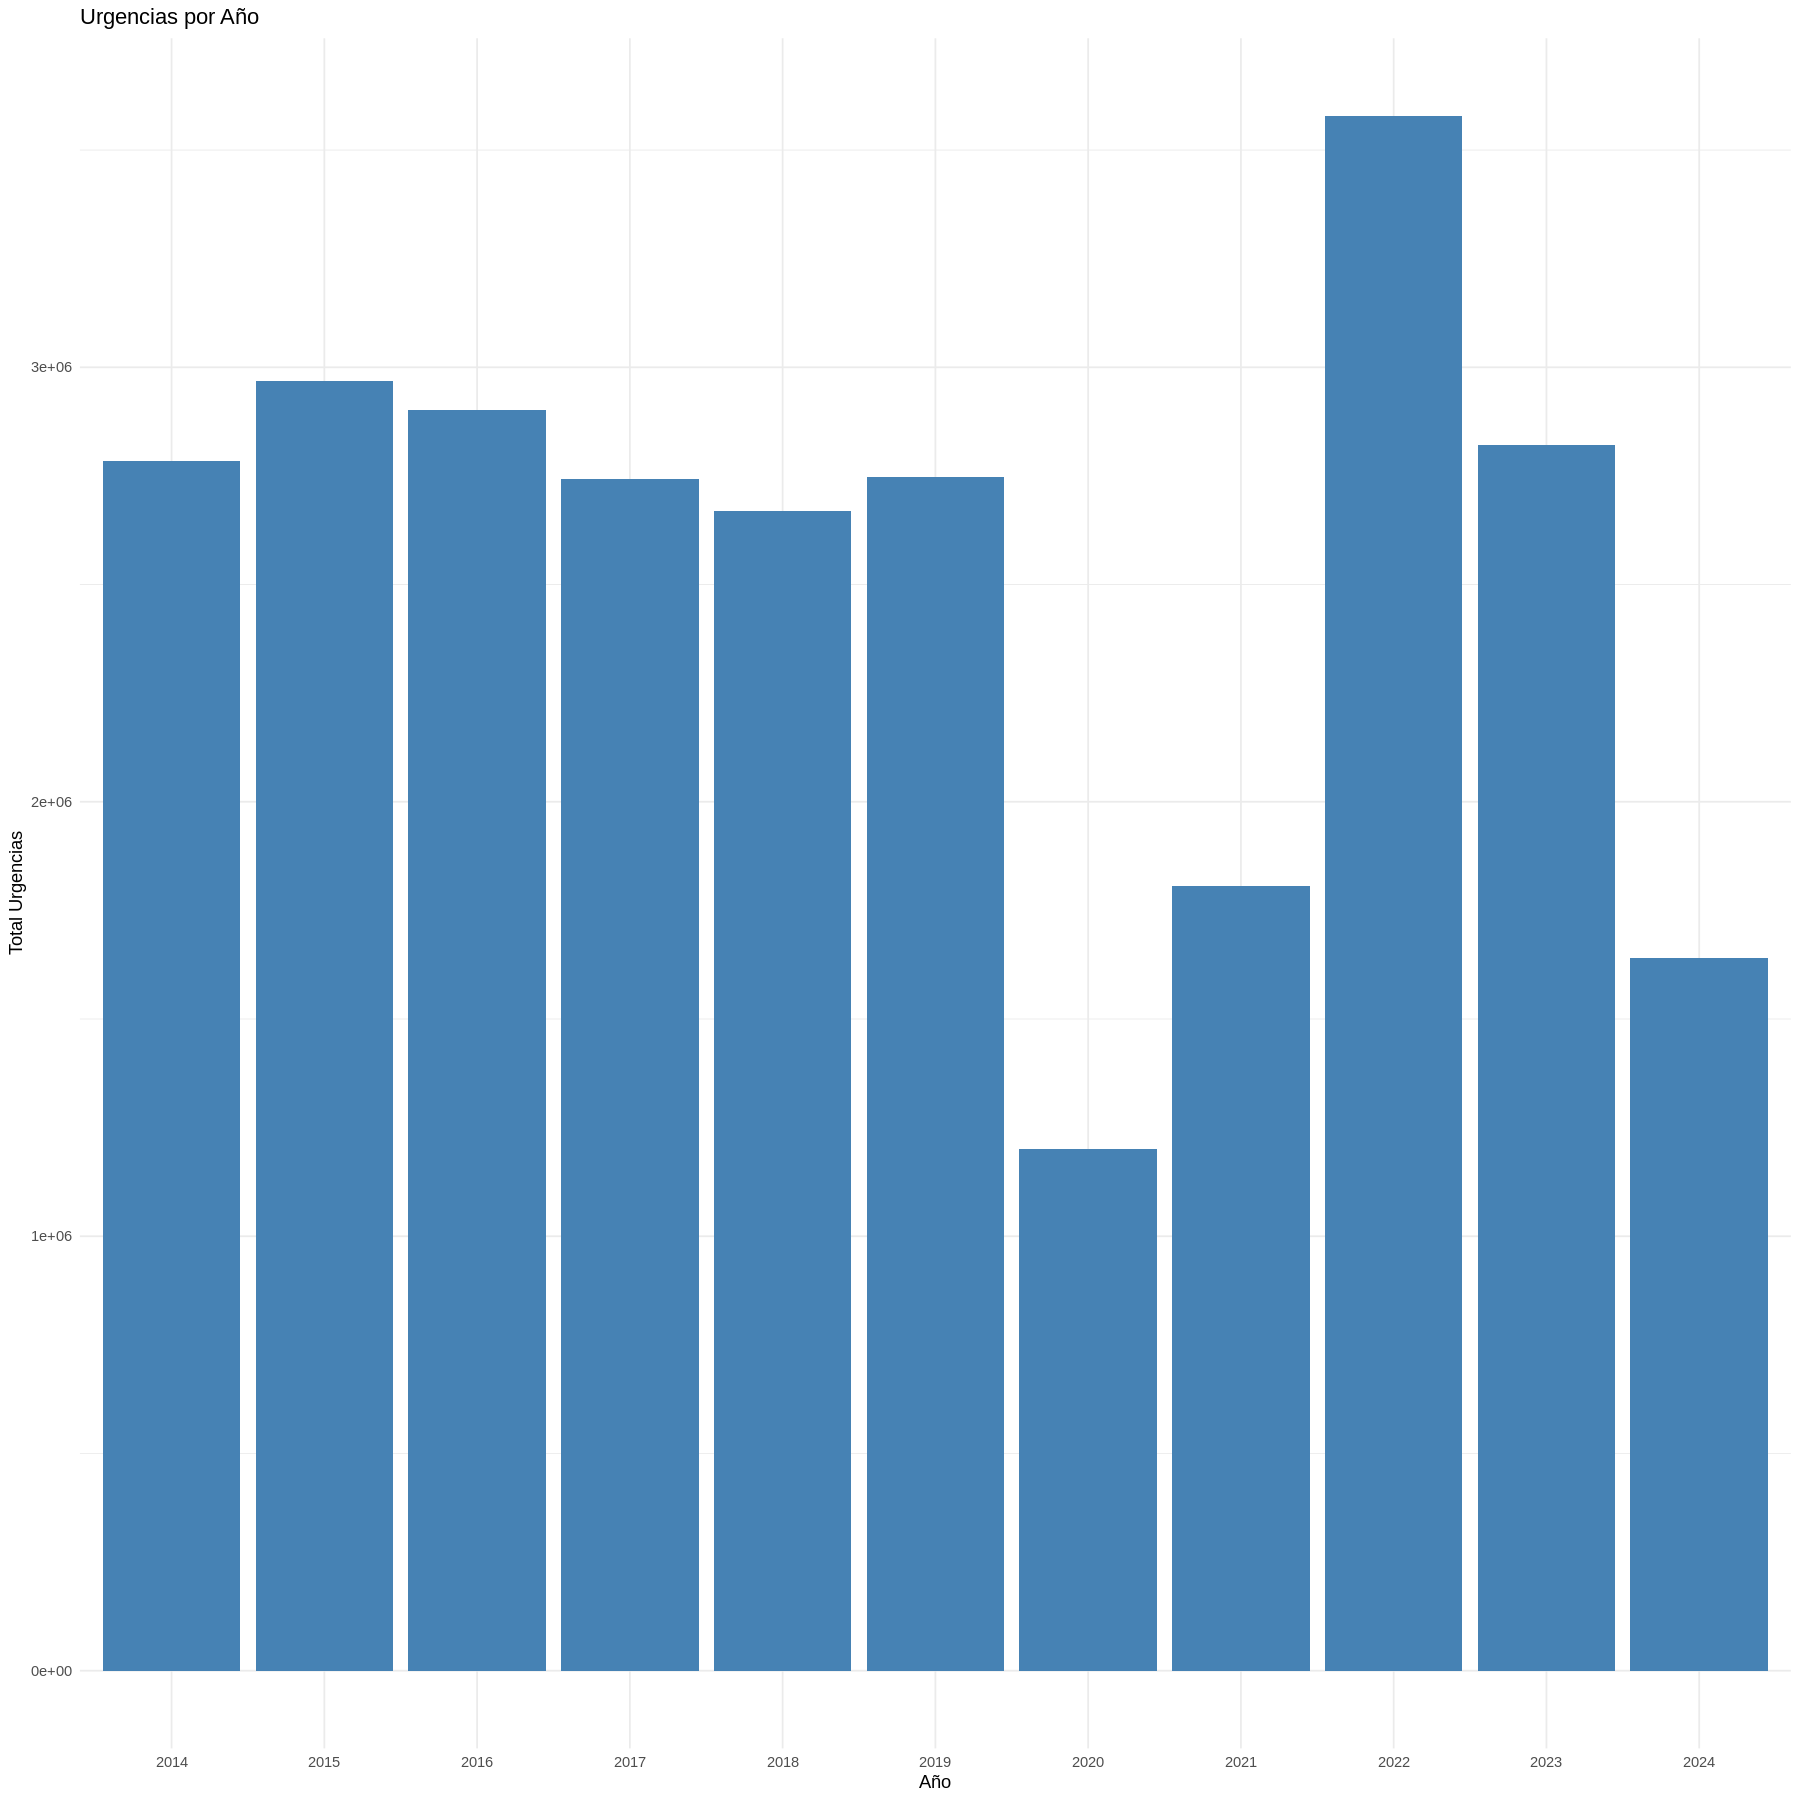

In [ ]:
df_agrupado <- df_urgr_esp_semanal %>%
  group_by(Anio) %>%
  summarise(Total = sum(NumTotal, na.rm = TRUE))
options(repr.plot.width = 15, repr.plot.height = 15)
ggplot(df_agrupado, aes(x = factor(Anio), y = Total)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(x = "Año", y = "Total Urgencias", title = "Urgencias por Año") +
  theme_minimal()

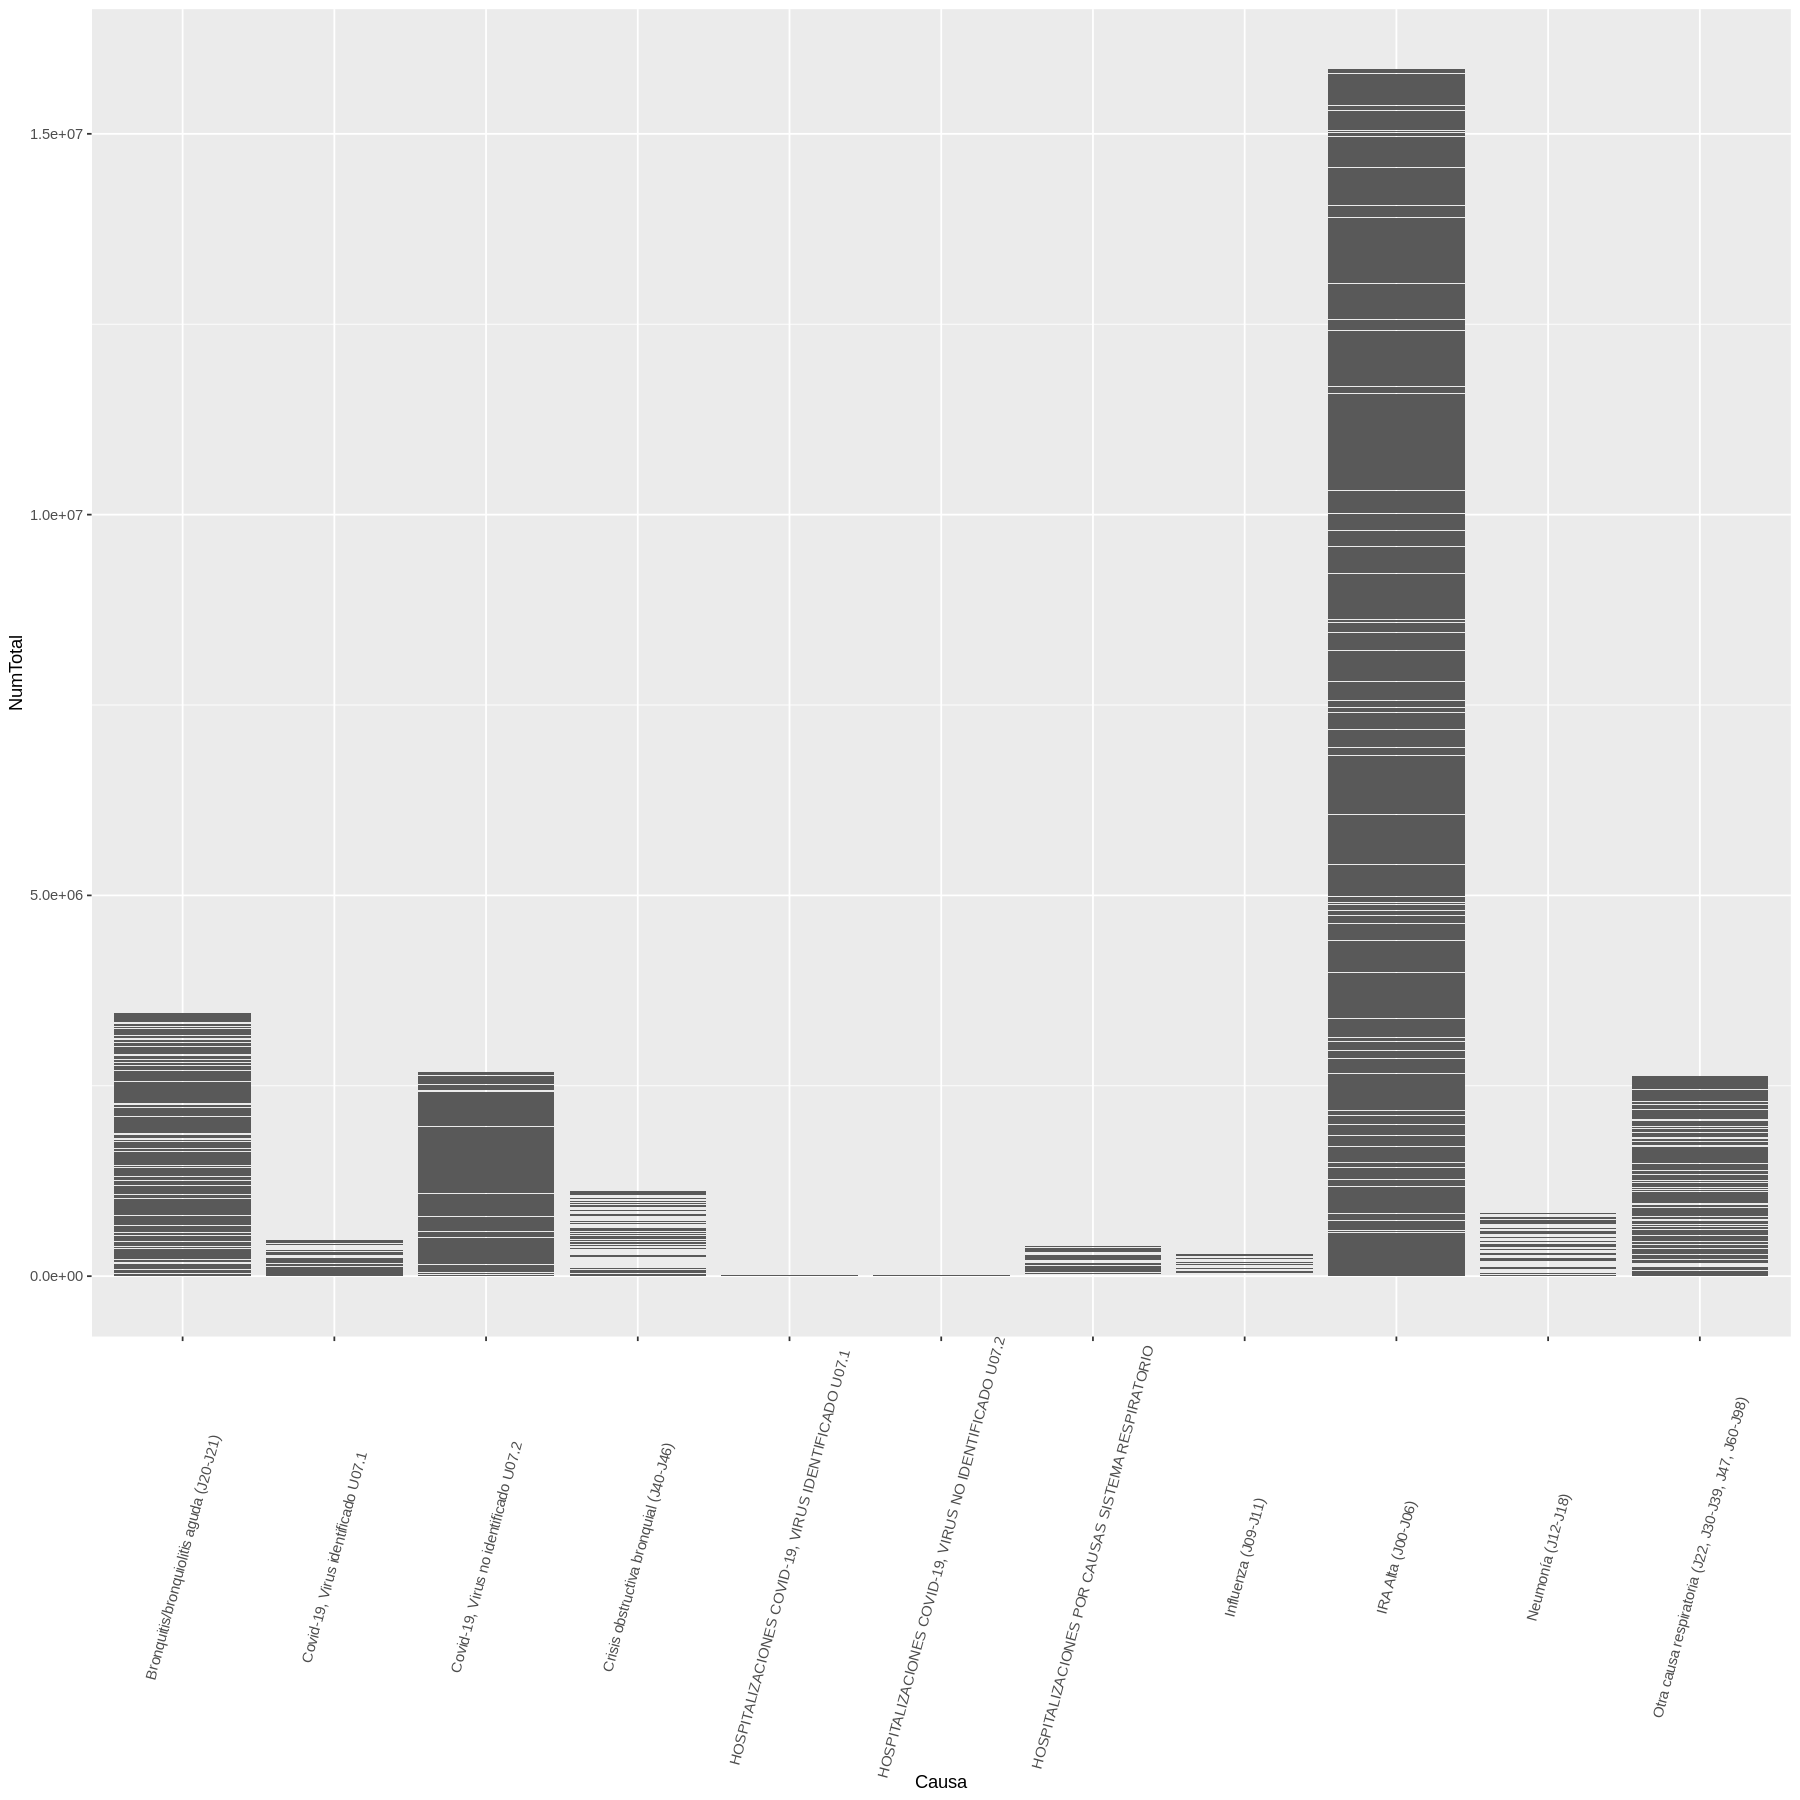

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 15)
ggplot(df_urgr_esp_semanal, aes(x=Causa, y= NumTotal)) + geom_bar(stat="identity") +
theme(axis.text.x = element_text(angle = 75, vjust = .5))